In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
data = pd.read_csv('bank_transactions.csv')

In [3]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10-01-1994,F,JAMSHEDPUR,17819.05,02-08-2016,143207,25.0
1,T2,C2142763,04-04-1957,M,JHAJJAR,2270.69,02-08-2016,141858,27999.0
2,T3,C4417068,26-11-1996,F,MUMBAI,17874.44,02-08-2016,142712,459.0
3,T4,C5342380,14-09-1973,F,MUMBAI,866503.21,02-08-2016,142714,2060.0
4,T5,C9031234,24-03-1988,F,NAVI MUMBAI,6714.43,02-08-2016,181156,1762.5


In [4]:
data.isnull().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                72
CustGender                 11
CustLocation                1
CustAccountBalance         27
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')

In [7]:
numeric_features = data[['CustAccountBalance','TransactionAmount (INR)']]

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_features)

In [9]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++')
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_) #wcss


In [10]:
wcss

[39778.00000000002,
 27870.67843405132,
 16554.843529289603,
 13842.9730880125,
 11126.944752888687,
 8169.9564649711265,
 5045.941398165761,
 4003.053110350795,
 3145.1161239178323,
 2775.6457559256323]

In [11]:
#k_range = range(1, 11)
#for k in k_range:
 #   kmeans = KMeans(n_clusters=k, random_state=42)
  #  kmeans.fit(scaled_data)
   # wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

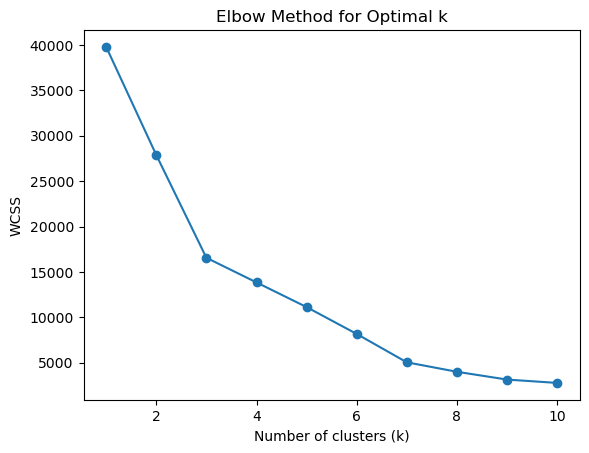

In [12]:
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=3, random_state=42)

In [14]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

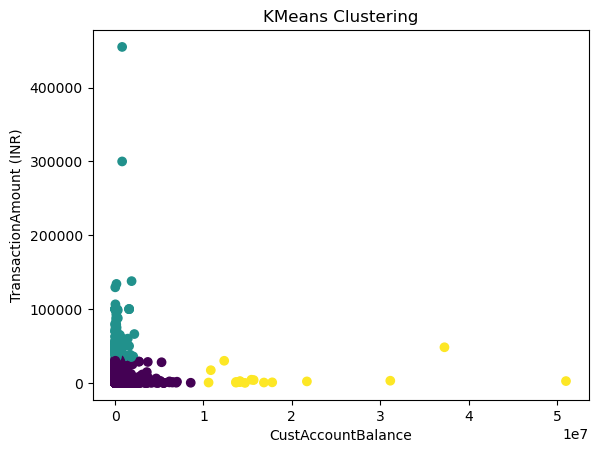

In [15]:
plt.scatter(data['CustAccountBalance'], data['TransactionAmount (INR)'], c=kmeans.labels_, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()
